In [1]:
import pandas as pd

In [3]:
dataset_url = "D:\SQL SERVER\cinemaTicket_Ref.csv.zip" 
df= pd.read_csv(dataset_url)
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ratho\AppData\Local\Temp\ipykernel_7084\175653317.py:1: SyntaxWarning: invalid escape sequence '\S'
  dataset_url = "D:\SQL SERVER\cinemaTicket_Ref.csv.zip"


   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
0       1492          304      3900000            26            0          4   
1       1492          352      3360000            42            0          5   
2       1492          489      2560000            32            0          4   
3       1492          429      1200000            12            0          1   
4       1492          524      1200000            15            0          3   

   occu_perc  ticket_price  ticket_use    capacity        date  month  \
0       4.26      150000.0          26  610.328638  2018-05-05      5   
1       8.08       80000.0          42  519.801980  2018-05-05      5   
2      20.00       80000.0          32  160.000000  2018-05-05      5   
3      11.01      100000.0          12  108.991826  2018-05-05      5   
4      16.67       80000.0          15   89.982004  2018-05-05      5   

   quarter  day  
0        2    5  
1        2    5  
2        2    5  
3       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB
None


In [6]:
print(df.describe())

           film_code    cinema_code   total_sales   tickets_sold  \
count  142524.000000  142524.000000  1.425240e+05  142524.000000   
mean     1518.985111     320.378427  1.234728e+07     140.137570   
std        36.184450     159.701229  3.065486e+07     279.758733   
min      1471.000000      32.000000  2.000000e+04       1.000000   
25%      1485.000000     181.000000  1.260000e+06      18.000000   
50%      1498.000000     324.000000  3.720000e+06      50.000000   
75%      1556.000000     474.000000  1.110000e+07     143.000000   
max      1589.000000     637.000000  1.262820e+09    8499.000000   

         tickets_out      show_time      occu_perc   ticket_price  \
count  142524.000000  142524.000000  142399.000000  142524.000000   
mean        0.237413       3.932103      19.965986   81234.599886   
std         2.923206       3.056276      22.653445   33236.599278   
min         0.000000       1.000000       0.000000     483.870968   
25%         0.000000       2.000000       

In [8]:
print(df.isnull().sum())

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64


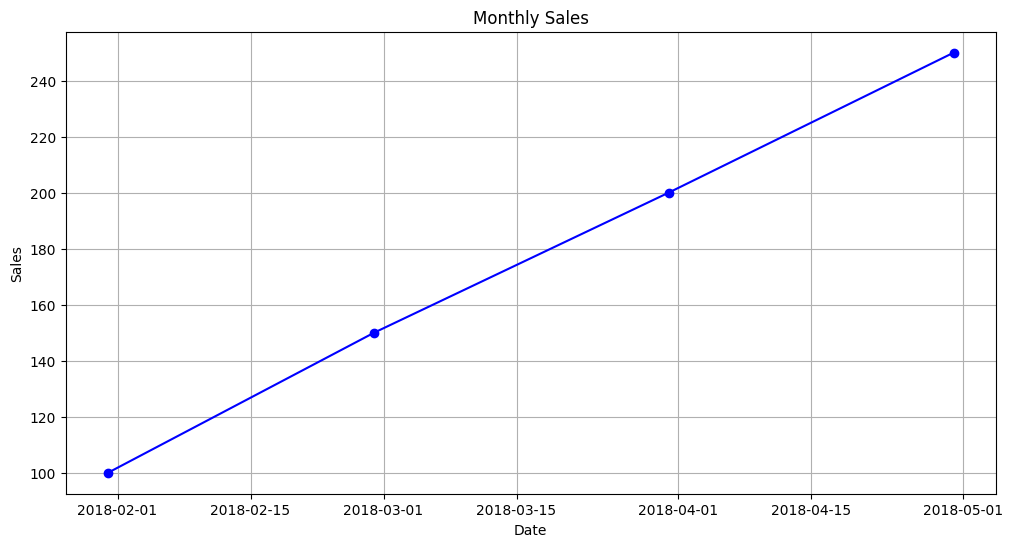

In [11]:
import pandas as pd

# Sample data creation for demonstration
data = {
    'Year': [2018, 2018, 2018, 2018],
    'Month': [1, 2, 3, 4],
    'Day': [15, 15, 15, 15],
    'Sales': [100, 150, 200, 250]
}

df = pd.DataFrame(data)

# Combine Year, Month, and Day columns to create a Date column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Resample the data to get monthly sales
monthly_sales = df['Sales'].resample('M').sum()

# Plot the monthly sales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')


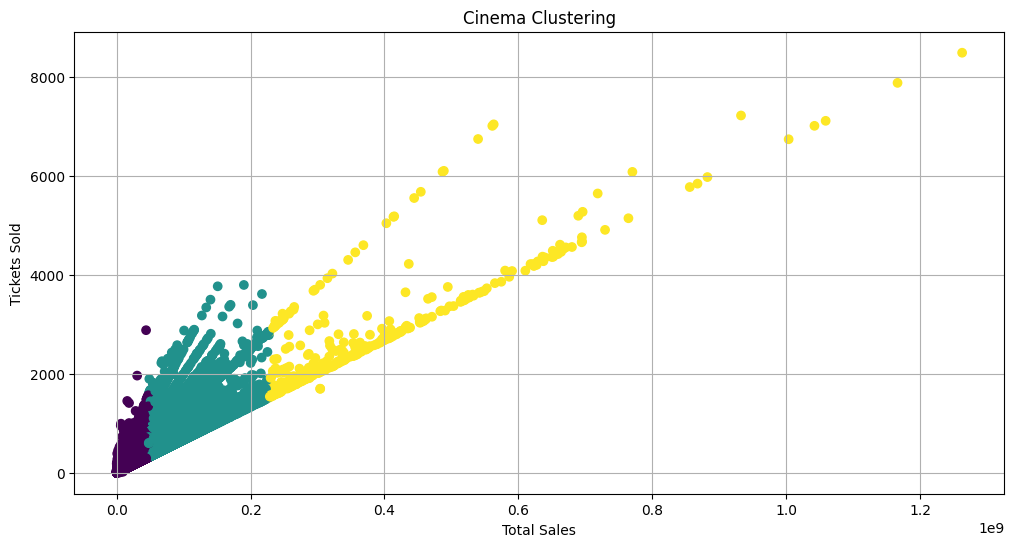

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Correct file path using raw string
dataset_url = r"D:\SQL SERVER\cinemaTicket_Ref.csv.zip"  # Replace with your dataset path or URL
df = pd.read_csv(dataset_url)

# Print the columns to check their names
print(df.columns)

# Correct column names based on the DataFrame
correct_column_names = ['total_sales', 'tickets_sold', 'ticket_price']

# Verify the correct column names exist in the DataFrame
for col in correct_column_names:
    if col not in df.columns:
        print(f"Column {col} is not present in the DataFrame")

# Assuming the correct columns are found, proceed with clustering
if all(col in df.columns for col in correct_column_names):
    X = df[correct_column_names]

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

    # Add the cluster labels to the original DataFrame
    df['Cluster'] = kmeans.labels_

    # Visualize the clusters
    plt.figure(figsize=(12, 6))
    plt.scatter(df['total_sales'], df['tickets_sold'], c=df['Cluster'], cmap='viridis', marker='o')
    plt.title('Cinema Clustering')
    plt.xlabel('Total Sales')
    plt.ylabel('Tickets Sold')
    plt.grid(True)
    plt.show()
else:
    print("Please ensure all the necessary columns are present in the DataFrame.")


In [19]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 217.9 kB/s eta 0:00:46
   ---------------------------------------- 0.1/9.8 MB 980.4 kB/s eta 0:00:10
   - -------------------------------------- 0.2/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.8 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.8 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/9.8 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/9.8 MB 2.1 MB/s eta 0:00:05
   ---- --------------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\ratho\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


C:\Users\ratho\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ratho\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


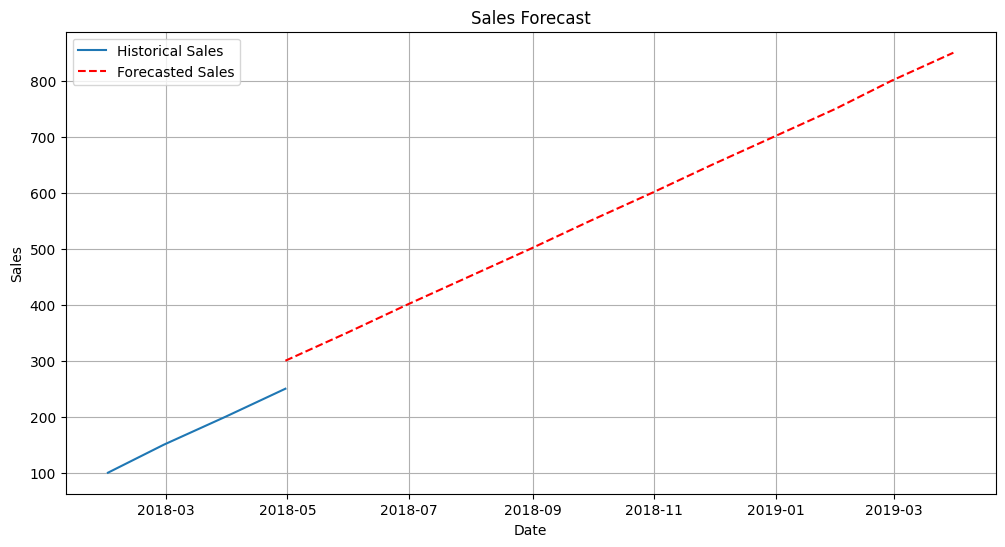

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data creation for demonstration
# Assuming `monthly_sales` is already defined as a pandas Series

# Fit an ARIMA model
model = ARIMA(monthly_sales, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M'), forecast, label='Forecasted Sales', linestyle='--', color='r')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
